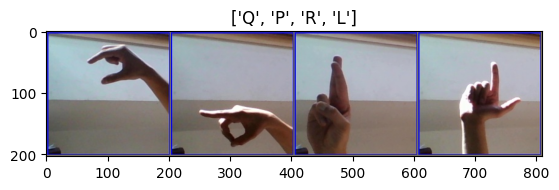

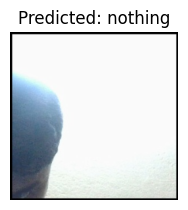

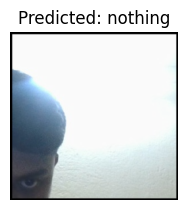

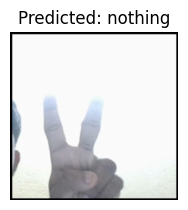

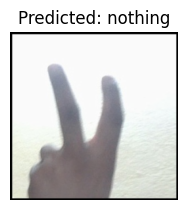

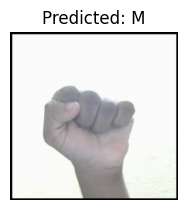

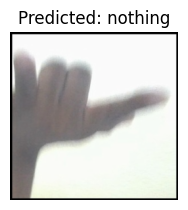

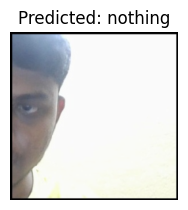

In [4]:
import cv2 
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

import cv2 
import datetime

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

# define a video capture object 
vid = cv2.VideoCapture(0) 
prev=datetime.datetime.now()
output = cv2.VideoWriter( 
        "output.avi", cv2.VideoWriter_fourcc(*'MPEG'),  
      30, (1080, 1920)) 
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
count=0
mode1=torch.load('state_dict_model.pt')
mode1.eval()
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])
def visualize_model_predictions(model,img_path):
    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])
    return class_names[preds[0]]
s=""
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 

    count+=1
  
    # Display the resulting frame 
    x=300
    h=300
    y=50
    frame=cv2.flip(frame,1)
    cv2.rectangle(frame,(x,y) ,(x+h,y+h),(0,0,0), 5) 
    output.write(frame)
    cv2.imshow('frame', frame) 
    curr=datetime.datetime.now()

    if abs(curr.second-prev.second) > 3:
        prev=curr
        cv2.imwrite('new_frame/frame%d.jpg'%count,frame[y:y+h,x:x+h])
        font = cv2.FONT_HERSHEY_SIMPLEX 
        y=visualize_model_predictions(
        mode1,
        img_path='new_frame/frame%d.jpg'%count
        )
        if y=='space':
            s+=' '
        if y=='del':
            s=s[:-1]
        if y != "nothing":
            s+=y
        image = cv2.imread("hey.png")
        text = s
        coordinates = (100,100)
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255,0,255)
        thickness = 2
        image = cv2.putText(image, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
        cv2.imshow("Text", image)
        cv2.imshow('frame', frame)
        cv2.waitKey(2)
         

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    
  
# After the loop release the cap object 
vid.release() 
output.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 